In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [3]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
#device = torch.device("cpu")
print(device)

cuda:0


In [4]:
save_dir='model_storage/General_Results'

In [5]:
from sklearn.metrics import confusion_matrix

## Post-Level Co-occurence

In [6]:
Y_post = pd.read_csv(save_dir+'/preds.csv', sep='\t', index_col='Unnamed: 0')
Y_post

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Confidence,Agreement,Split
0,0.023308,0.092600,0.013124,0.008048,0.196725,0.106169,0.049425,0.006630,0.503971,0.073991,...,0.016723,0.110538,0.003947,0.002881,0.003196,0.003373,0.008975,0.640173,0.511985,3
1,0.007802,0.028861,0.005184,0.002837,0.035748,0.039839,0.007949,0.002255,0.869525,0.137170,...,0.012703,0.096044,0.004870,0.003663,0.003719,0.004303,0.009441,0.804773,0.758477,1
2,0.046474,0.078024,0.019920,0.013998,0.189559,0.294794,0.076289,0.013048,0.267894,0.152243,...,0.011432,0.131497,0.004096,0.003283,0.002871,0.003469,0.009972,0.541068,0.398835,3
3,0.039600,0.167872,0.037128,0.013169,0.010623,0.062525,0.611162,0.047346,0.010575,0.056670,...,0.021234,0.621870,0.009843,0.006424,0.004495,0.007312,0.009619,0.779347,0.699834,2
4,0.224977,0.389542,0.008062,0.058410,0.010918,0.248220,0.037936,0.010347,0.011587,0.188741,...,0.013952,0.359828,0.005026,0.003659,0.002521,0.003093,0.009433,0.613210,0.462161,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.021323,0.395644,0.141878,0.023077,0.005902,0.021139,0.320682,0.055967,0.014388,0.322753,...,0.018147,0.045551,0.005918,0.004739,0.004198,0.006988,0.011462,0.636219,0.484799,2
2947,0.007031,0.036870,0.279541,0.015145,0.003105,0.003098,0.569580,0.080729,0.004902,0.295648,...,0.017517,0.058423,0.005918,0.004885,0.004262,0.007980,0.011796,0.699740,0.596711,3
2948,0.066964,0.518670,0.059821,0.024642,0.014110,0.028481,0.230130,0.045167,0.012014,0.307637,...,0.021037,0.036960,0.006333,0.005501,0.004894,0.008167,0.011490,0.641245,0.524926,3
2949,0.292696,0.283671,0.057701,0.035209,0.014874,0.188822,0.078696,0.034312,0.014019,0.368661,...,0.013481,0.041714,0.004622,0.004239,0.003453,0.005919,0.012276,0.569789,0.437757,2


In [7]:
(Y_post['Confidence']+Y_post['Agreement']).describe()

count    2951.000000
mean        1.199809
std         0.252657
min         0.505432
25%         1.027311
50%         1.217104
75%         1.399544
max         1.745822
dtype: float64

In [8]:
pred = torch.tensor(np.array(Y_post[(Y_post['Confidence']+Y_post['Agreement'])>1.027311])).to(device)
pred.shape

torch.Size([2213, 23])

In [9]:
def top_k_confusion_matrix(y, y_pred, k=3):
    dim = y_pred.shape[-1]
    y = y.topk(k=k, axis=1)[1]
    y_pred = y_pred.topk(k=k, axis=1)[1]
    conf = np.zeros((dim, dim))
    for i in range(1):
        for j in range(k):
            conf = np.add(conf, confusion_matrix(y[:,i], y_pred[:,j], labels = range(dim)))
    return conf

In [10]:
classes = ['Criterion i', 'Criterion ii', 'Criterion iii', 'Criterion iv', 'Criterion v', 'Criterion vi', 
              'Criterion vii', 'Criterion viii', 'Criterion ix', 'Criterion x', 'Others']
categories = ['Building Elements',
 'Urban Form Elements',
 'Gastronomy',
 'Interior Scenery',
 'Natural Features and\nLand-scape Scenery',
 'Monuments and\nBuildings',
 'Peoples Activity and\nAssociation',
 'Artifact Products',
 'Urban Scenery']

In [11]:
categories_new = ['Monuments and\nBuildings',
                  'Building Elements',
                  'Urban Form Elements',
                  'Urban Scenery',
                  'Natural Features and\nLand-scape Scenery',
                  'Interior Scenery',
                  'Peoples Activity and\nAssociation',
                  'Gastronomy',
                  'Artifact Products']

In [12]:
O_1 = pd.DataFrame(confusion_matrix(pred[:,:9].argmax(axis=1).cpu(), 
            pred[:,9:20].argmax(axis=1).cpu(), labels = range(11))[:9,:], index=categories, columns=classes)
O_1 = O_1.loc[categories_new]
O_1

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,129,57,104,90,0,106,0,0,0,0,0
Building Elements,99,51,100,43,0,52,0,0,0,0,0
Urban Form Elements,118,80,248,72,0,117,0,0,0,0,0
Urban Scenery,15,4,3,2,0,1,0,0,0,0,0
Natural Features and\nLand-scape Scenery,68,19,49,14,0,92,0,0,0,0,0
Interior Scenery,34,10,23,4,0,23,0,0,0,0,0
Peoples Activity and\nAssociation,79,59,81,30,0,100,0,0,0,0,0
Gastronomy,2,1,18,11,0,4,0,0,0,0,0
Artifact Products,0,0,0,0,0,0,0,0,0,1,0


In [13]:
O_1.sum()

Criterion i       544
Criterion ii      281
Criterion iii     626
Criterion iv      266
Criterion v         0
Criterion vi      495
Criterion vii       0
Criterion viii      0
Criterion ix        0
Criterion x         1
Others              0
dtype: int64

In [14]:
O_3 = pd.DataFrame(top_k_confusion_matrix(pred[:,:9].cpu(), pred[:,9:20].cpu(), k=3)[:9,:], index=categories, columns=classes)
O_3 = O_3.loc[categories_new]
O_3

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,241.0,201.0,317.0,379.0,2.0,318.0,0.0,0.0,0.0,0.0,0.0
Building Elements,185.0,181.0,273.0,212.0,2.0,182.0,0.0,0.0,0.0,0.0,0.0
Urban Form Elements,222.0,243.0,554.0,460.0,2.0,421.0,3.0,0.0,0.0,0.0,0.0
Urban Scenery,18.0,19.0,12.0,22.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
Natural Features and\nLand-scape Scenery,114.0,78.0,194.0,156.0,0.0,182.0,2.0,0.0,0.0,0.0,0.0
Interior Scenery,56.0,51.0,73.0,43.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0
Peoples Activity and\nAssociation,142.0,159.0,306.0,212.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0
Gastronomy,5.0,10.0,32.0,35.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0
Artifact Products,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
O = 2*((O_3.T/O_3.T.sum()).T)*(O_3/O_3.sum())/(O_3/O_3.sum()+(O_3.T/O_3.T.sum()).T)
O

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,0.197460,0.167500,0.196894,0.254619,0.002730,0.221064,NaN,NaN,NaN,NaN,NaN
Building Elements,0.183350,0.183106,0.195209,0.166014,0.003839,0.148329,NaN,NaN,NaN,NaN,NaN
Urban Form Elements,0.153740,0.170706,0.302154,0.268692,0.002092,0.253309,0.003140,NaN,NaN,NaN,NaN
Urban Scenery,0.034026,0.037365,0.013065,0.027604,NaN,0.005355,NaN,NaN,NaN,NaN,NaN
Natural Features and\nLand-scape Scenery,0.133411,0.093525,0.155949,0.138976,NaN,0.169697,0.005464,NaN,NaN,NaN,NaN
Interior Scenery,0.088538,0.083333,0.071429,0.047751,NaN,0.069371,NaN,NaN,NaN,NaN,NaN
Peoples Activity and\nAssociation,0.139901,0.159879,0.217871,0.165238,NaN,0.184915,NaN,NaN,NaN,NaN,NaN
Gastronomy,0.009166,0.019048,0.034225,0.043024,0.017391,0.032744,NaN,NaN,NaN,NaN,NaN
Artifact Products,NaN,NaN,0.001133,NaN,NaN,NaN,0.222222,NaN,NaN,0.5,NaN


In [16]:
pred.shape

torch.Size([2213, 23])

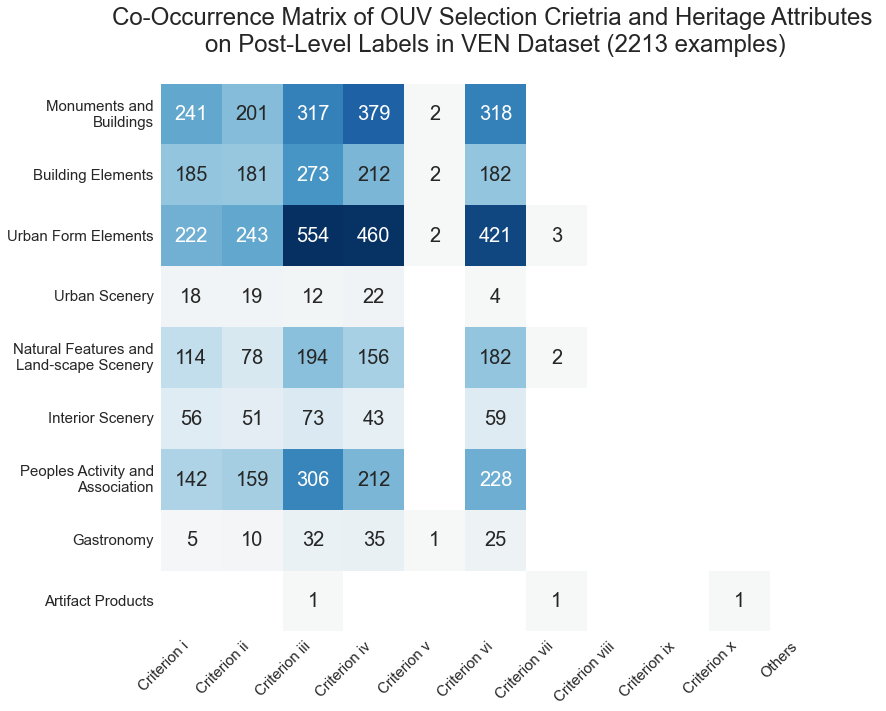

In [22]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.0f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

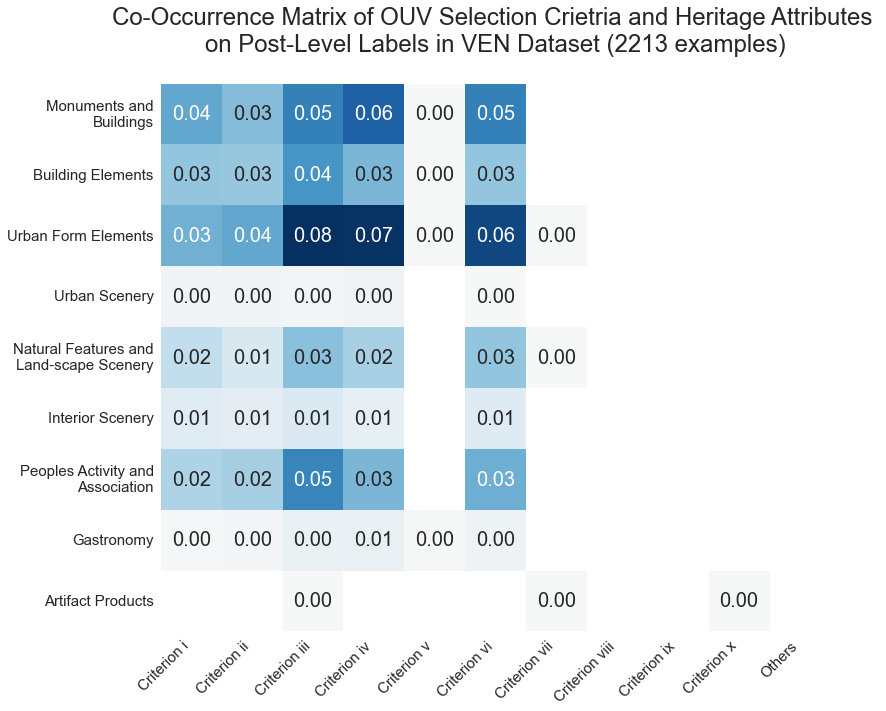

In [23]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

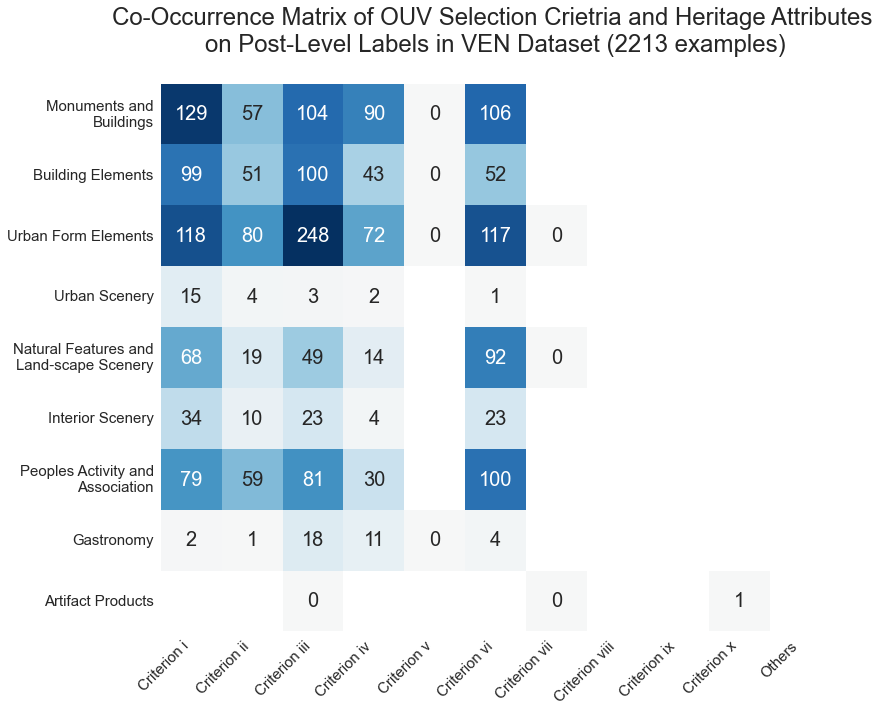

In [24]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_1, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.0f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

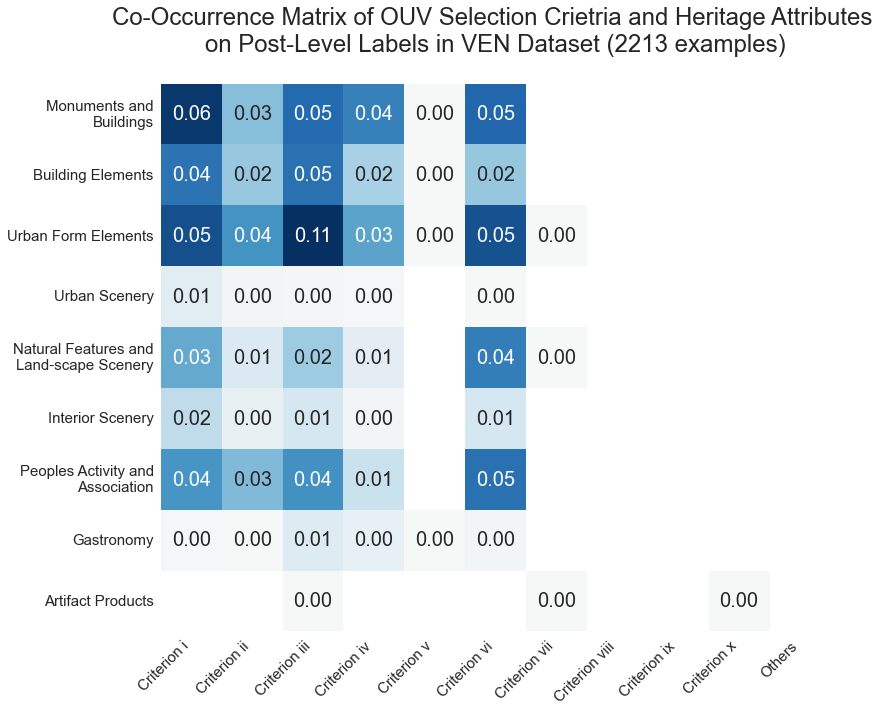

In [25]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_1/pred.shape[0], annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

In [26]:
(O_3/pred.shape[0]/3).sum().sum()

1.0

## Post-Level Co-occurence XL

In [27]:
Y_post = pd.read_csv(save_dir+'/preds_XL.csv', sep='\t', index_col='Unnamed: 0')
Y_post

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Confidence,Agreement,Split
0,0.537724,0.072497,0.023566,0.037800,0.011643,0.239657,0.028061,0.023010,0.026043,0.225410,...,0.025080,0.069138,0.005065,0.004105,0.003443,0.004174,0.009989,0.702721,0.553973,2
1,0.266822,0.017705,0.001483,0.006402,0.002683,0.688358,0.003694,0.002522,0.010332,0.201570,...,0.020980,0.083225,0.002840,0.002714,0.002272,0.002595,0.008858,0.804932,0.692497,2
2,0.013112,0.284023,0.014802,0.012405,0.463999,0.020587,0.113919,0.011397,0.065757,0.083799,...,0.028259,0.437207,0.031026,0.016339,0.012229,0.017151,0.016630,0.665210,0.519971,0
3,0.025554,0.272558,0.031688,0.021360,0.063268,0.132266,0.367078,0.028610,0.057617,0.046096,...,0.059767,0.259919,0.019228,0.011341,0.013703,0.013224,0.015740,0.559387,0.383159,0
4,0.006616,0.909048,0.006113,0.002524,0.002362,0.051826,0.009289,0.002223,0.009999,0.026473,...,0.101382,0.090424,0.006236,0.003555,0.005438,0.006320,0.010417,0.829402,0.775994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80958,0.063393,0.252998,0.011522,0.012524,0.011825,0.514142,0.037315,0.009290,0.086992,0.111516,...,0.015232,0.102113,0.003600,0.003777,0.003618,0.003685,0.010313,0.679981,0.555320,3
80959,0.930688,0.015330,0.001392,0.025953,0.006745,0.007861,0.005936,0.004718,0.001378,0.222278,...,0.008915,0.087776,0.002579,0.003693,0.002650,0.002715,0.009001,0.816770,0.771911,3
80960,0.827661,0.044392,0.002604,0.045729,0.007355,0.048676,0.011862,0.008082,0.003639,0.287133,...,0.005977,0.154269,0.003332,0.003863,0.002434,0.002748,0.009790,0.746888,0.724135,2
80961,0.608399,0.196407,0.012783,0.039235,0.010137,0.027618,0.078385,0.021311,0.005724,0.168558,...,0.010497,0.132461,0.003136,0.003483,0.003042,0.003166,0.009745,0.644930,0.592894,0


In [28]:
(Y_post['Confidence']+Y_post['Agreement']).describe()

count    80963.000000
mean         1.179237
std          0.247123
min          0.332639
25%          1.007322
50%          1.199278
75%          1.372788
max          1.728553
dtype: float64

In [29]:
pred = torch.tensor(np.array(Y_post[(Y_post['Confidence']+Y_post['Agreement'])>1.007322])).to(device)
pred.shape

torch.Size([60722, 23])

In [30]:
def top_k_confusion_matrix(y, y_pred, k=3):
    dim = y_pred.shape[-1]
    y = y.topk(k=k, axis=1)[1]
    y_pred = y_pred.topk(k=k, axis=1)[1]
    conf = np.zeros((dim, dim))
    for i in range(1):
        for j in range(k):
            conf = np.add(conf, confusion_matrix(y[:,i], y_pred[:,j], labels = range(dim)))
    return conf

In [31]:
classes = ['Criterion i', 'Criterion ii', 'Criterion iii', 'Criterion iv', 'Criterion v', 'Criterion vi', 
              'Criterion vii', 'Criterion viii', 'Criterion ix', 'Criterion x', 'Others']
categories = ['Building Elements',
 'Urban Form Elements',
 'Gastronomy',
 'Interior Scenery',
 'Natural Features and\nLand-scape Scenery',
 'Monuments and\nBuildings',
 'Peoples Activity and\nAssociation',
 'Artifact Products',
 'Urban Scenery']

In [32]:
categories_new = ['Monuments and\nBuildings',
                  'Building Elements',
                  'Urban Form Elements',
                  'Urban Scenery',
                  'Natural Features and\nLand-scape Scenery',
                  'Interior Scenery',
                  'Peoples Activity and\nAssociation',
                  'Gastronomy',
                  'Artifact Products']

In [33]:
O_1 = pd.DataFrame(confusion_matrix(pred[:,:9].argmax(axis=1).cpu(), 
            pred[:,9:20].argmax(axis=1).cpu(), labels = range(11))[:9,:], index=categories, columns=classes)
O_1 = O_1.loc[categories_new]
O_1

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,1222,657,1893,969,0,3240,0,0,0,0,0
Building Elements,1215,724,2280,679,0,2015,0,0,0,0,0
Urban Form Elements,1646,1428,6911,1271,0,5003,0,0,0,0,0
Urban Scenery,51,21,127,11,0,48,0,0,0,0,0
Natural Features and\nLand-scape Scenery,611,329,2186,275,0,6338,7,0,0,0,0
Interior Scenery,450,389,559,129,0,747,0,0,0,0,0
Peoples Activity and\nAssociation,847,1058,4991,458,0,9154,0,0,0,3,0
Gastronomy,33,32,441,49,0,205,0,0,0,1,0
Artifact Products,3,0,1,0,0,6,0,0,0,9,0


In [34]:
O_1.sum()

Criterion i        6078
Criterion ii       4638
Criterion iii     19389
Criterion iv       3841
Criterion v           0
Criterion vi      26756
Criterion vii         7
Criterion viii        0
Criterion ix          0
Criterion x          13
Others                0
dtype: int64

In [35]:
O_3 = pd.DataFrame(top_k_confusion_matrix(pred[:,:9].cpu(), pred[:,9:20].cpu(), k=3)[:9,:], index=categories, columns=classes)
O_3 = O_3.loc[categories_new]
O_3

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,2749.0,1892.0,6710.0,6268.0,1.0,6320.0,2.0,0.0,0.0,1.0,0.0
Building Elements,2547.0,2194.0,6323.0,4797.0,0.0,4873.0,2.0,0.0,0.0,3.0,0.0
Urban Form Elements,3985.0,3599.0,15485.0,12605.0,16.0,13049.0,30.0,0.0,0.0,8.0,0.0
Urban Scenery,132.0,72.0,238.0,207.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0
Natural Features and\nLand-scape Scenery,2231.0,1314.0,9365.0,7135.0,0.0,9094.0,92.0,0.0,0.0,7.0,0.0
Interior Scenery,1164.0,829.0,2047.0,1253.0,0.0,1529.0,0.0,0.0,0.0,0.0,0.0
Peoples Activity and\nAssociation,3577.0,2471.0,16175.0,12550.0,1.0,14737.0,8.0,0.0,0.0,14.0,0.0
Gastronomy,155.0,109.0,758.0,611.0,0.0,640.0,2.0,0.0,0.0,8.0,0.0
Artifact Products,6.0,3.0,19.0,3.0,0.0,7.0,9.0,0.0,0.0,10.0,0.0


In [36]:
O = 2*((O_3.T/O_3.T.sum()).T)*(O_3/O_3.sum())/(O_3/O_3.sum()+(O_3.T/O_3.T.sum()).T)
O

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,0.135790,0.103882,0.165550,0.180707,0.000083,0.170082,0.000166,NaN,NaN,0.000083,NaN
Building Elements,0.136623,0.132081,0.162422,0.144995,NaN,0.137049,0.000192,NaN,NaN,0.000289,NaN
Urban Form Elements,0.122009,0.117499,0.292454,0.267605,0.000656,0.263215,0.001226,NaN,NaN,0.000328,NaN
Urban Scenery,0.015242,0.010862,0.008222,0.008960,NaN,0.004888,NaN,NaN,NaN,NaN,NaN
Natural Features and\nLand-scape Scenery,0.097458,0.062990,0.216888,0.191115,NaN,0.228458,0.006262,NaN,NaN,0.000478,NaN
Interior Scenery,0.099623,0.085884,0.064027,0.047961,NaN,0.053465,NaN,NaN,NaN,NaN,NaN
Peoples Activity and\nAssociation,0.108264,0.079689,0.303320,0.264316,0.000040,0.295014,0.000322,NaN,NaN,0.000565,NaN
Gastronomy,0.016464,0.014764,0.025521,0.025612,NaN,0.024308,0.001647,NaN,NaN,0.006855,NaN
Artifact Products,0.000723,0.000478,0.000665,0.000132,NaN,0.000278,0.089109,NaN,NaN,0.185185,NaN


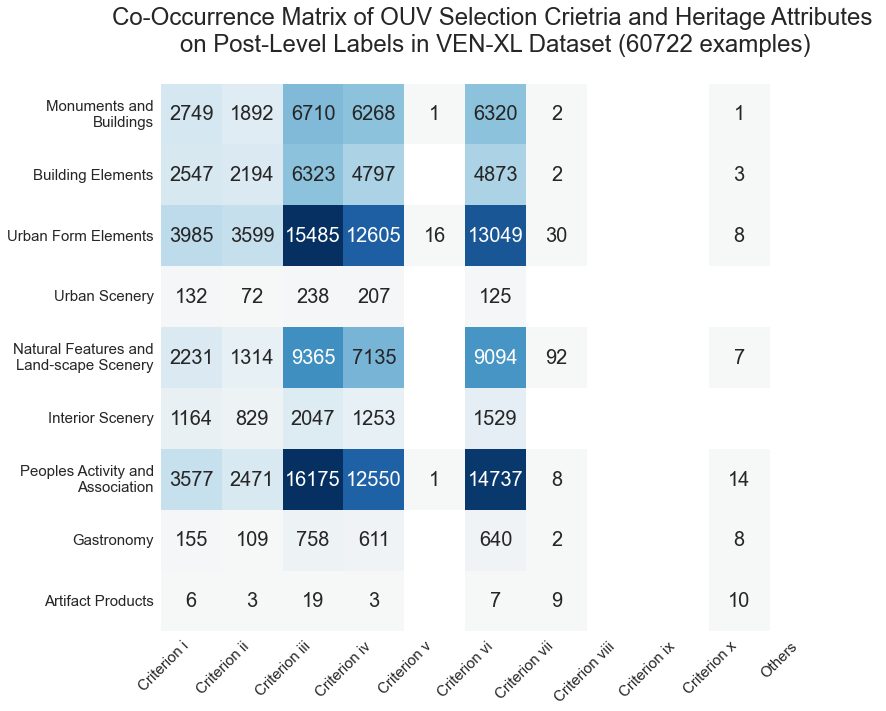

In [37]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.0f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN-XL Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

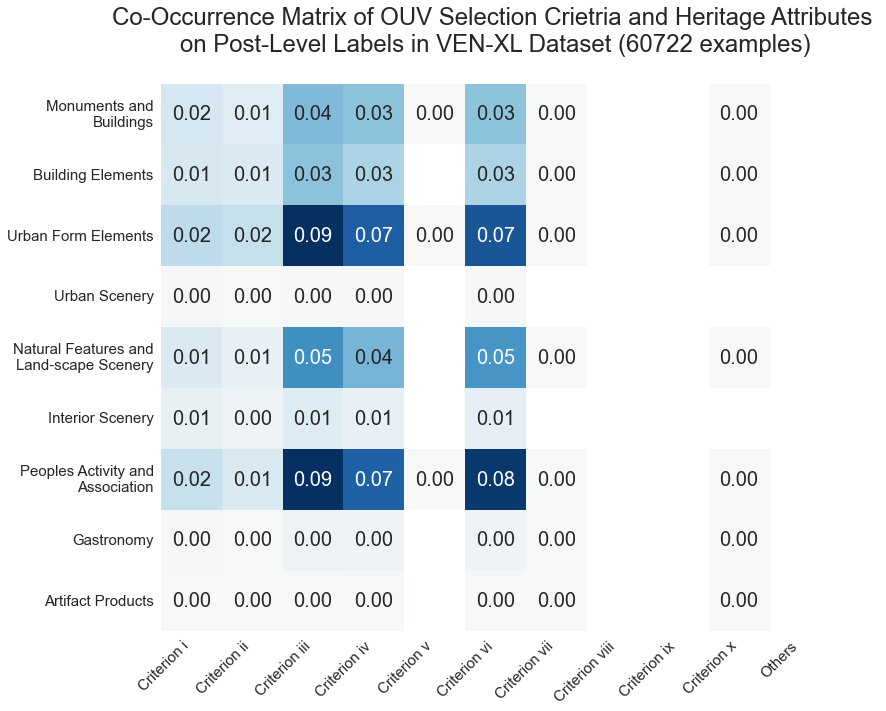

In [38]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN-XL Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

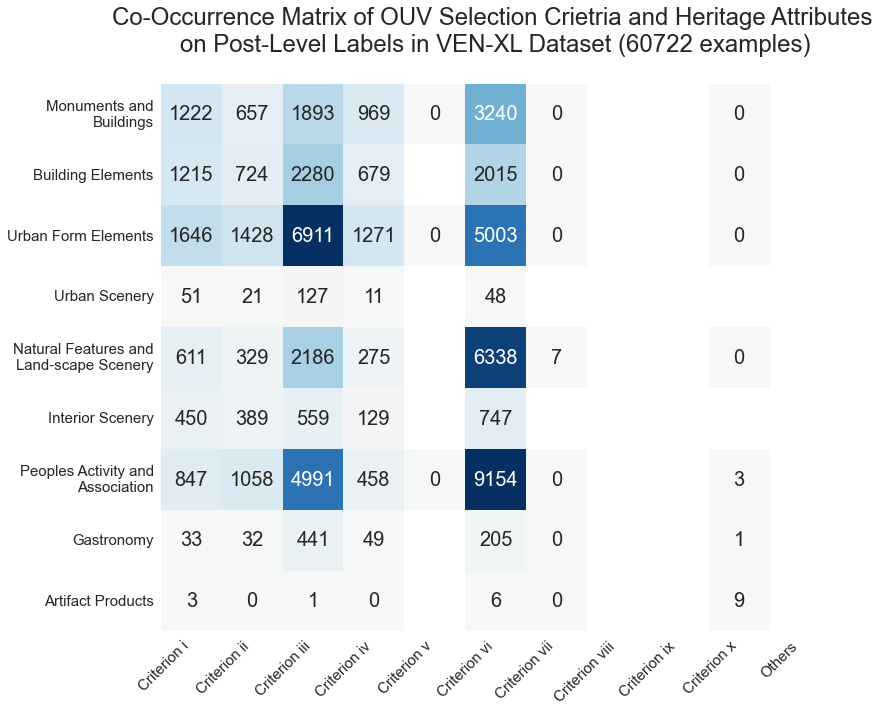

In [39]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_1, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.0f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN-XL Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

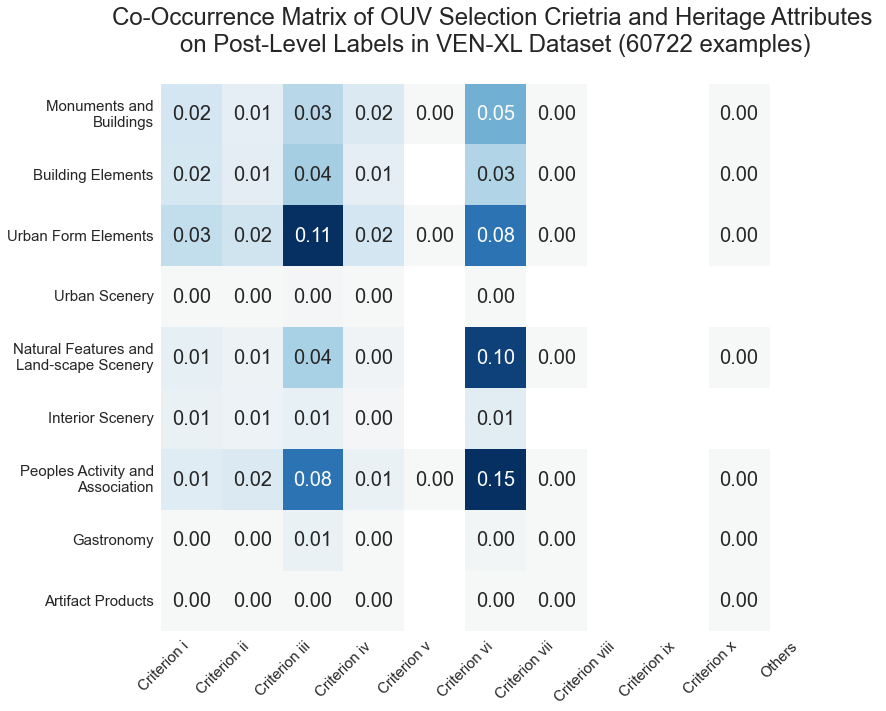

In [40]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_1/pred.shape[0], annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Post-Level Labels in VEN-XL Dataset ({} examples)\n'.format(pred.shape[0]),size=24)
    plt.show()

## Spatial-Level Co-occurence

In [41]:
import pickle

with open(save_dir + '/spatial_values.p', 'rb') as handle:
    spatial_y_np = pickle.load(handle)

In [86]:
Y_place = spatial_y_np[0.99]
Y_place

array([[0.03565199, 0.10415025, 0.09035592, ..., 0.12505949, 0.07182355,
        0.05146396],
       [0.08458491, 0.28369468, 0.16248559, ..., 0.33731332, 0.1974422 ,
        0.09329807],
       [0.00809552, 0.02897051, 0.0225385 , ..., 0.06431217, 0.0194986 ,
        0.01336328],
       ...,
       [0.00301766, 0.01022906, 0.00693046, ..., 0.00995368, 0.00737882,
        0.00395574],
       [0.00430525, 0.01489943, 0.01065396, ..., 0.01670687, 0.01088164,
        0.00599511],
       [0.00428709, 0.01380994, 0.00996586, ..., 0.01552374, 0.00980995,
        0.0055206 ]])

In [87]:
pred = torch.tensor(np.array(Y_place.T)).to(device)
pred.shape

torch.Size([935, 20])

In [68]:
def top_k_confusion_matrix(y, y_pred, k=3):
    dim = y_pred.shape[-1]
    y = y.topk(k=k, axis=1)[1]
    y_pred = y_pred.topk(k=k, axis=1)[1]
    conf = np.zeros((dim, dim))
    for i in range(1):
        for j in range(k):
            conf = np.add(conf, confusion_matrix(y[:,i], y_pred[:,j], labels = range(dim)))
    return conf

In [69]:
classes = ['Criterion i', 'Criterion ii', 'Criterion iii', 'Criterion iv', 'Criterion v', 'Criterion vi', 
              'Criterion vii', 'Criterion viii', 'Criterion ix', 'Criterion x', 'Others']
categories = ['Building Elements',
 'Urban Form Elements',
 'Gastronomy',
 'Interior Scenery',
 'Natural Features and\nLand-scape Scenery',
 'Monuments and\nBuildings',
 'Peoples Activity and\nAssociation',
 'Artifact Products',
 'Urban Scenery']

In [58]:
categories_new = ['Monuments and\nBuildings',
                  'Building Elements',
                  'Urban Form Elements',
                  'Urban Scenery',
                  'Natural Features and\nLand-scape Scenery',
                  'Interior Scenery',
                  'Peoples Activity and\nAssociation',
                  'Gastronomy',
                  'Artifact Products']

In [88]:
O_1 = pd.DataFrame(confusion_matrix(pred[:,:9].argmax(axis=1).cpu(), 
            pred[:,9:20].argmax(axis=1).cpu(), labels = range(11))[:9,:], index=categories, columns=classes)
O_1 = O_1.loc[categories_new]
O_1

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,0,0,7,0,0,0,0,0,0,0,0
Building Elements,0,0,1,0,0,0,0,0,0,0,0
Urban Form Elements,38,18,655,158,0,31,0,0,0,0,0
Urban Scenery,0,0,1,0,0,0,0,0,0,0,0
Natural Features and\nLand-scape Scenery,1,1,5,1,0,9,0,0,0,0,0
Interior Scenery,0,0,0,0,0,0,0,0,0,0,0
Peoples Activity and\nAssociation,3,0,4,0,0,1,0,0,0,0,0
Gastronomy,0,0,0,0,0,0,0,0,0,0,0
Artifact Products,0,0,0,0,0,0,0,0,0,1,0


In [60]:
O_1.sum()

Criterion i       206
Criterion ii      112
Criterion iii     316
Criterion iv      120
Criterion v         0
Criterion vi      180
Criterion vii       0
Criterion viii      0
Criterion ix        0
Criterion x         1
Others              0
dtype: int64

In [61]:
O_1.sum(axis=1)

Monuments and\nBuildings                    157
Building Elements                           122
Urban Form Elements                         347
Urban Scenery                                 4
Natural Features and\nLand-scape Scenery    106
Interior Scenery                             25
Peoples Activity and\nAssociation           153
Gastronomy                                   19
Artifact Products                             2
dtype: int64

In [84]:
O_3 = pd.DataFrame(top_k_confusion_matrix(pred[:,:9].cpu(), pred[:,9:20].cpu(), k=3)[:9,:], index=categories, columns=classes)
O_3 = O_3.loc[categories_new]
O_3

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,33.0,14.0,38.0,34.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
Building Elements,7.0,12.0,26.0,18.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
Urban Form Elements,340.0,160.0,719.0,483.0,0.0,571.0,1.0,0.0,0.0,0.0,0.0
Urban Scenery,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Natural Features and\nLand-scape Scenery,26.0,13.0,47.0,20.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
Interior Scenery,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Peoples Activity and\nAssociation,34.0,21.0,49.0,15.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0
Gastronomy,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Artifact Products,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [72]:
O = 2*((O_3.T/O_3.T.sum()).T)*(O_3/O_3.sum())/(O_3/O_3.sum()+(O_3.T/O_3.T.sum()).T)
O

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,0.182692,0.124309,0.166800,0.196783,NaN,0.174664,NaN,NaN,NaN,NaN,NaN
Building Elements,0.128671,0.144975,0.155752,0.144681,NaN,0.123243,NaN,NaN,NaN,NaN,NaN
Urban Form Elements,0.197802,0.166564,0.378731,0.313204,NaN,0.307375,0.001516,NaN,NaN,NaN,NaN
Urban Scenery,NaN,0.019169,0.007177,0.009288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Natural Features and\nLand-scape Scenery,0.124260,0.080986,0.144821,0.115427,NaN,0.153499,NaN,NaN,NaN,NaN,NaN
Interior Scenery,0.042918,0.033520,0.036322,0.031838,NaN,0.032544,NaN,NaN,NaN,NaN,NaN
Peoples Activity and\nAssociation,0.156522,0.129125,0.193443,0.153398,NaN,0.173399,NaN,NaN,NaN,NaN,NaN
Gastronomy,0.017738,0.017493,0.025404,0.038462,NaN,0.024206,NaN,NaN,NaN,NaN,NaN
Artifact Products,NaN,NaN,0.004802,0.003110,NaN,0.003185,0.250000,NaN,NaN,0.285714,NaN


In [64]:
pred.shape

torch.Size([935, 20])

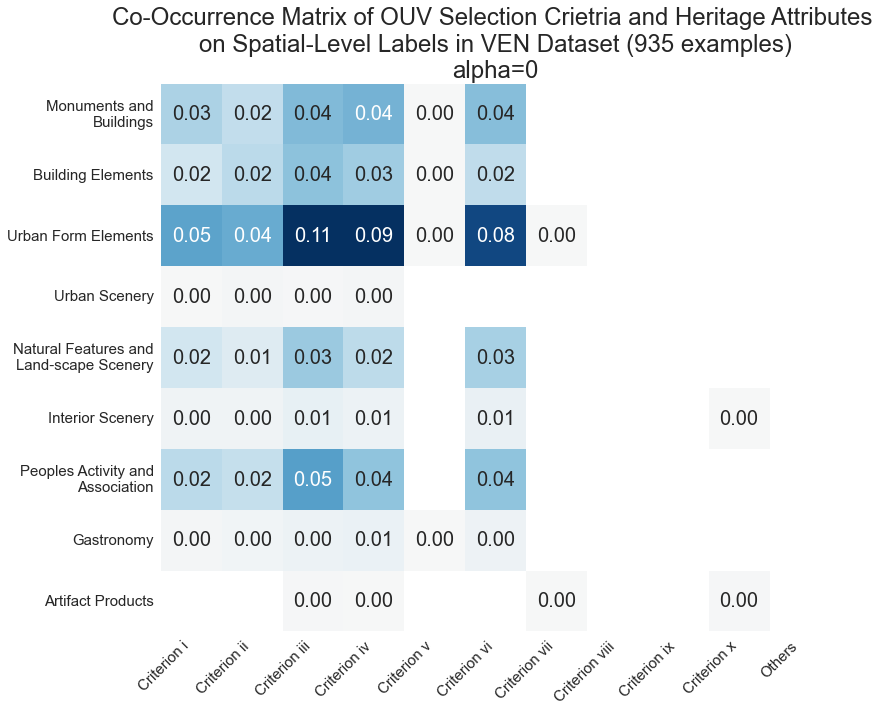

In [65]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN Dataset ({} examples)\nalpha=0'.format(pred.shape[0]),size=24)
    plt.show()

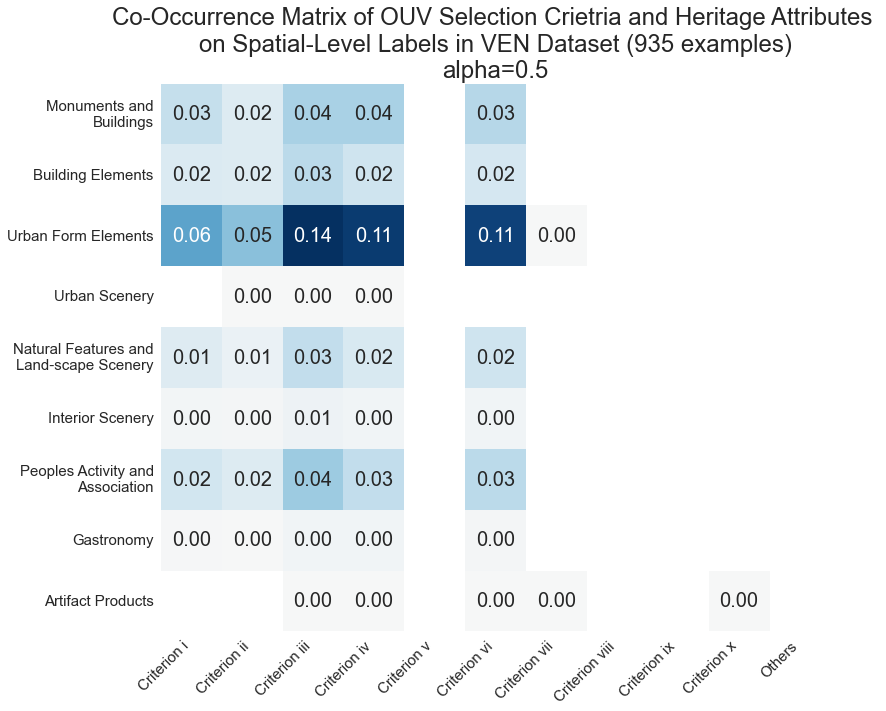

In [73]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN Dataset ({} examples)\nalpha=0.5'.format(pred.shape[0]),size=24)
    plt.show()

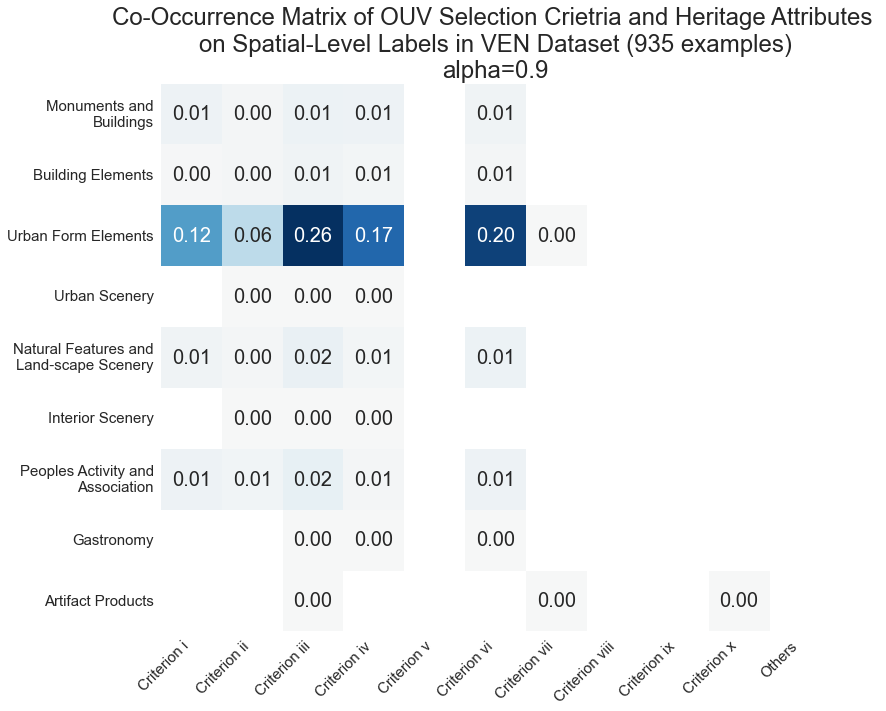

In [85]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN Dataset ({} examples)\nalpha=0.9'.format(pred.shape[0]),size=24)
    plt.show()

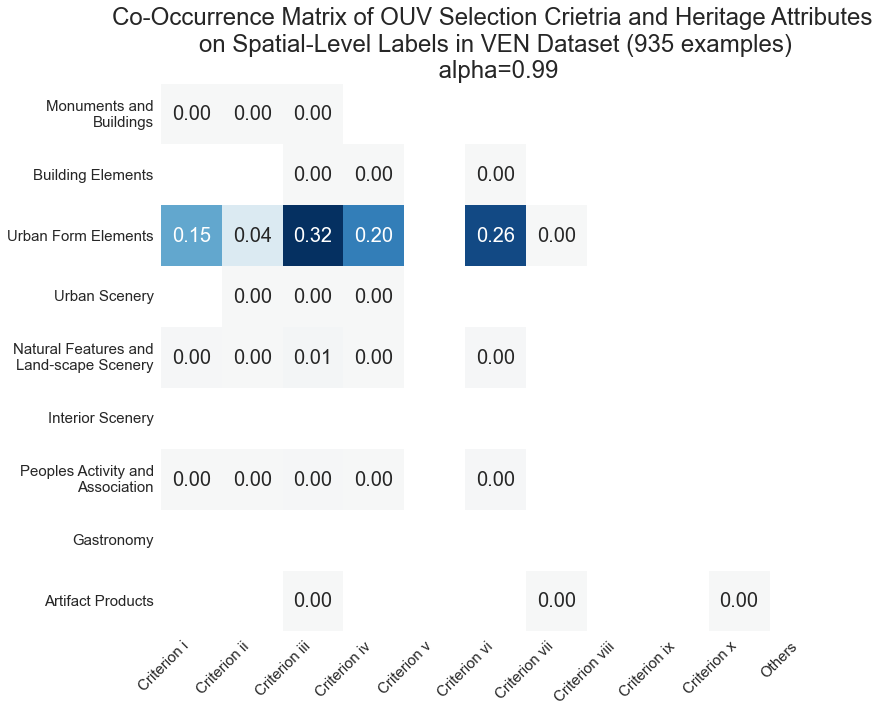

In [81]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN Dataset ({} examples)\n alpha=0.99'.format(pred.shape[0]),size=24)
    plt.show()

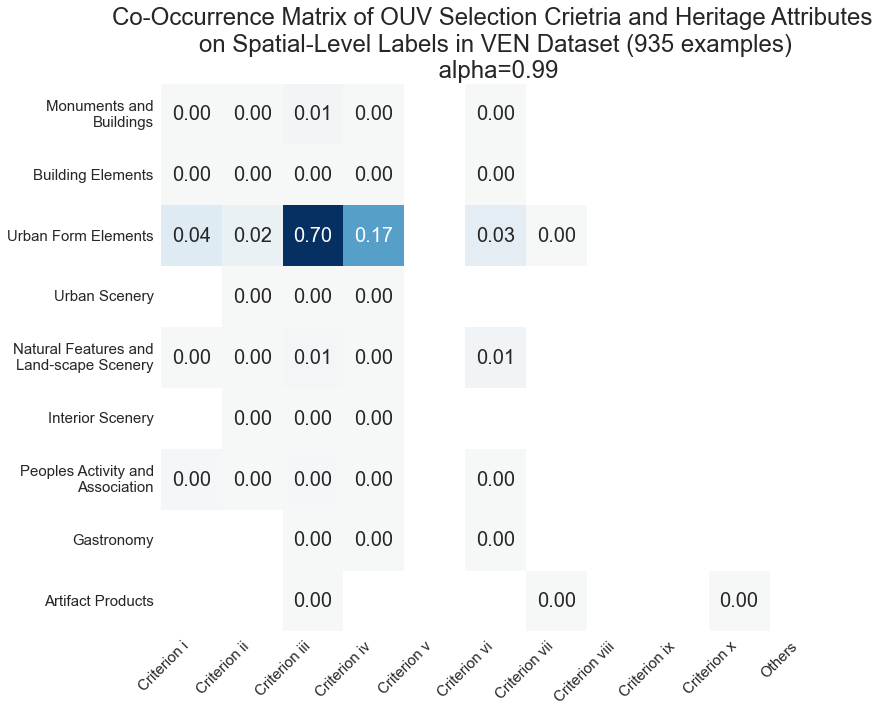

In [89]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_1/pred.shape[0], annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN Dataset ({} examples)\n alpha=0.99'.format(pred.shape[0]),size=24)
    plt.show()

## Spatial-Level Co-occurence XL

In [90]:
import pickle

with open(save_dir + '/spatial_values_XL.p', 'rb') as handle:
    spatial_y_np = pickle.load(handle)

In [118]:
Y_place = spatial_y_np[0.99]
Y_place

array([[0.15278431, 0.15452553, 0.29243913, ..., 0.11946252, 0.17651967,
        0.10417486],
       [0.34728288, 0.35507304, 0.72094607, ..., 0.27290041, 0.41005343,
        0.26473054],
       [0.05013436, 0.05209613, 0.10844792, ..., 0.03818291, 0.05583749,
        0.03318667],
       ...,
       [0.01247619, 0.01282135, 0.02550268, ..., 0.00971428, 0.01462977,
        0.00919382],
       [0.01848063, 0.01899407, 0.03810805, ..., 0.01449378, 0.02182603,
        0.01367287],
       [0.01734293, 0.01783334, 0.03503006, ..., 0.01310031, 0.01955683,
        0.01199329]])

In [119]:
pred = torch.tensor(np.array(Y_place.T)).to(device)
pred.shape

torch.Size([3571, 20])

In [94]:
def top_k_confusion_matrix(y, y_pred, k=3):
    dim = y_pred.shape[-1]
    y = y.topk(k=k, axis=1)[1]
    y_pred = y_pred.topk(k=k, axis=1)[1]
    conf = np.zeros((dim, dim))
    for i in range(1):
        for j in range(k):
            conf = np.add(conf, confusion_matrix(y[:,i], y_pred[:,j], labels = range(dim)))
    return conf

In [95]:
classes = ['Criterion i', 'Criterion ii', 'Criterion iii', 'Criterion iv', 'Criterion v', 'Criterion vi', 
              'Criterion vii', 'Criterion viii', 'Criterion ix', 'Criterion x', 'Others']
categories = ['Building Elements',
 'Urban Form Elements',
 'Gastronomy',
 'Interior Scenery',
 'Natural Features and\nLand-scape Scenery',
 'Monuments and\nBuildings',
 'Peoples Activity and\nAssociation',
 'Artifact Products',
 'Urban Scenery']

In [96]:
categories_new = ['Monuments and\nBuildings',
                  'Building Elements',
                  'Urban Form Elements',
                  'Urban Scenery',
                  'Natural Features and\nLand-scape Scenery',
                  'Interior Scenery',
                  'Peoples Activity and\nAssociation',
                  'Gastronomy',
                  'Artifact Products']

In [120]:
O_1 = pd.DataFrame(confusion_matrix(pred[:,:9].argmax(axis=1).cpu(), 
            pred[:,9:20].argmax(axis=1).cpu(), labels = range(11))[:9,:], index=categories, columns=classes)
O_1 = O_1.loc[categories_new]
O_1

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,0,0,0,1,0,0,0,0,0,0,0
Building Elements,0,0,1,0,0,0,0,0,0,0,0
Urban Form Elements,2,0,2026,1,0,1457,0,0,0,0,0
Urban Scenery,0,0,0,0,0,0,0,0,0,0,0
Natural Features and\nLand-scape Scenery,2,0,7,1,0,38,0,0,0,0,0
Interior Scenery,0,0,0,0,0,0,0,0,0,0,0
Peoples Activity and\nAssociation,1,0,19,1,0,14,0,0,0,0,0
Gastronomy,0,0,0,0,0,0,0,0,0,0,0
Artifact Products,0,0,0,0,0,0,0,0,0,0,0


In [121]:
O_1.sum()

Criterion i          5
Criterion ii         0
Criterion iii     2053
Criterion iv         4
Criterion v          0
Criterion vi      1509
Criterion vii        0
Criterion viii       0
Criterion ix         0
Criterion x          0
Others               0
dtype: int64

In [122]:
O_1.sum(axis=1)

Monuments and\nBuildings                       1
Building Elements                              1
Urban Form Elements                         3486
Urban Scenery                                  0
Natural Features and\nLand-scape Scenery      48
Interior Scenery                               0
Peoples Activity and\nAssociation             35
Gastronomy                                     0
Artifact Products                              0
dtype: int64

In [123]:
O_3 = pd.DataFrame(top_k_confusion_matrix(pred[:,:9].cpu(), pred[:,9:20].cpu(), k=3)[:9,:], index=categories, columns=classes)
O_3 = O_3.loc[categories_new]
O_3

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Building Elements,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Urban Form Elements,91.0,1.0,3486.0,3395.0,0.0,3485.0,0.0,0.0,0.0,0.0,0.0
Urban Scenery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Natural Features and\nLand-scape Scenery,10.0,2.0,48.0,37.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0
Interior Scenery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Peoples Activity and\nAssociation,11.0,2.0,34.0,24.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0
Gastronomy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artifact Products,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
O = 2*((O_3.T/O_3.T.sum()).T)*(O_3/O_3.sum())/(O_3/O_3.sum()+(O_3.T/O_3.T.sum()).T)
O

,Criterion i,Criterion ii,Criterion iii,Criterion iv,Criterion v,Criterion vi,Criterion vii,Criterion viii,Criterion ix,Criterion x,Others
Monuments and\nBuildings,NaN,0.222222,0.000560,0.000578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Building Elements,NaN,NaN,0.000560,0.000578,NaN,0.000560,NaN,NaN,NaN,NaN,NaN
Urban Form Elements,0.017219,0.000191,0.497006,0.487928,NaN,0.496970,NaN,NaN,NaN,NaN,NaN
Urban Scenery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Natural Features and\nLand-scape Scenery,0.078125,0.026667,0.025848,0.020544,NaN,0.025330,NaN,NaN,NaN,NaN,NaN
Interior Scenery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Peoples Activity and\nAssociation,0.101382,0.036036,0.018503,0.013472,NaN,0.018519,NaN,NaN,NaN,NaN,NaN
Gastronomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artifact Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
pred.shape

torch.Size([3571, 20])

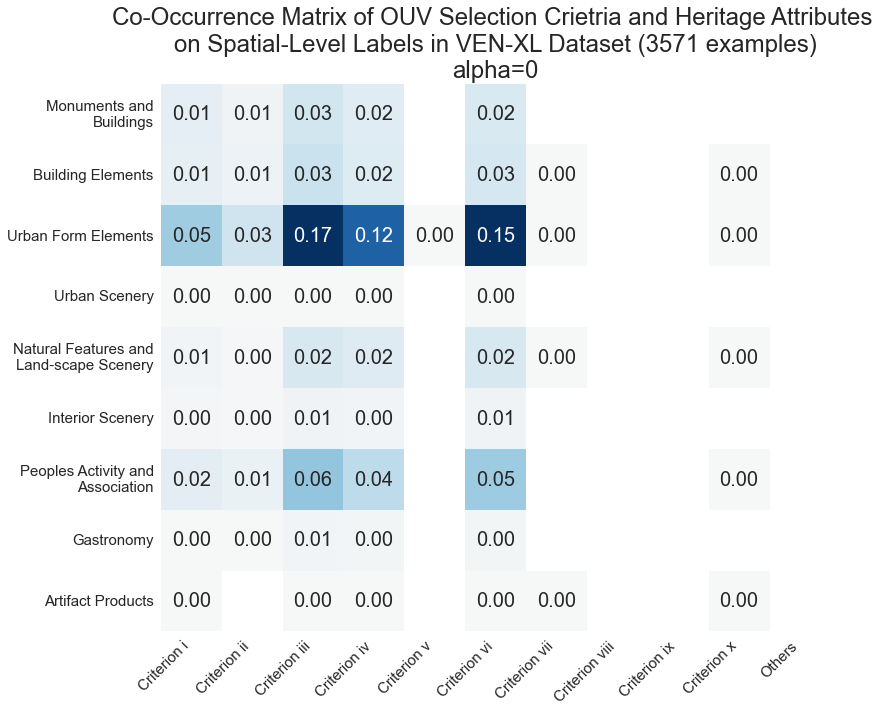

In [103]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN-XL Dataset ({} examples)\nalpha=0'.format(pred.shape[0]),size=24)
    plt.show()

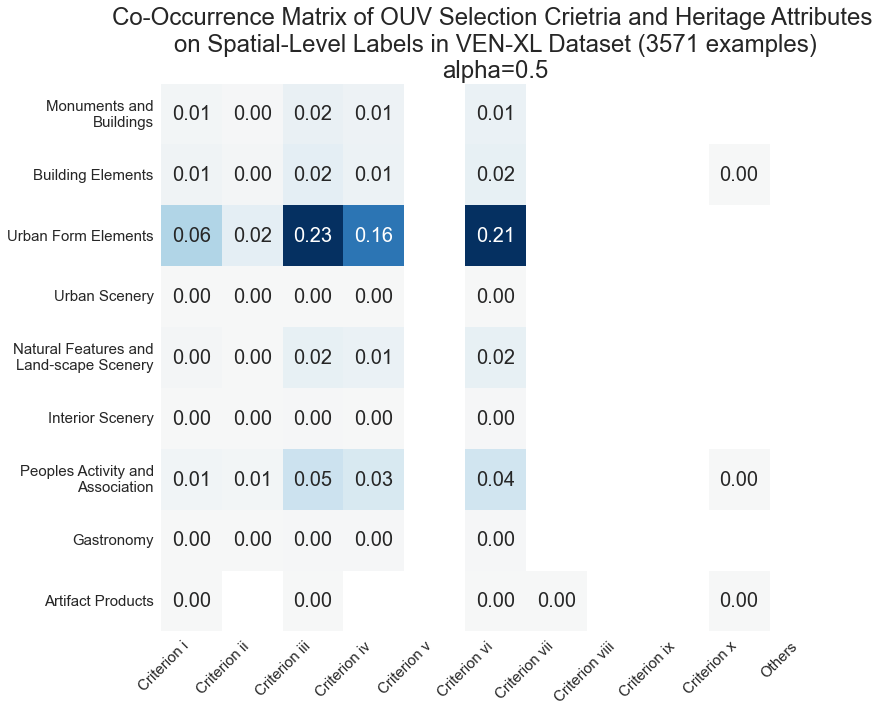

In [110]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN-XL Dataset ({} examples)\nalpha=0.5'.format(pred.shape[0]),size=24)
    plt.show()

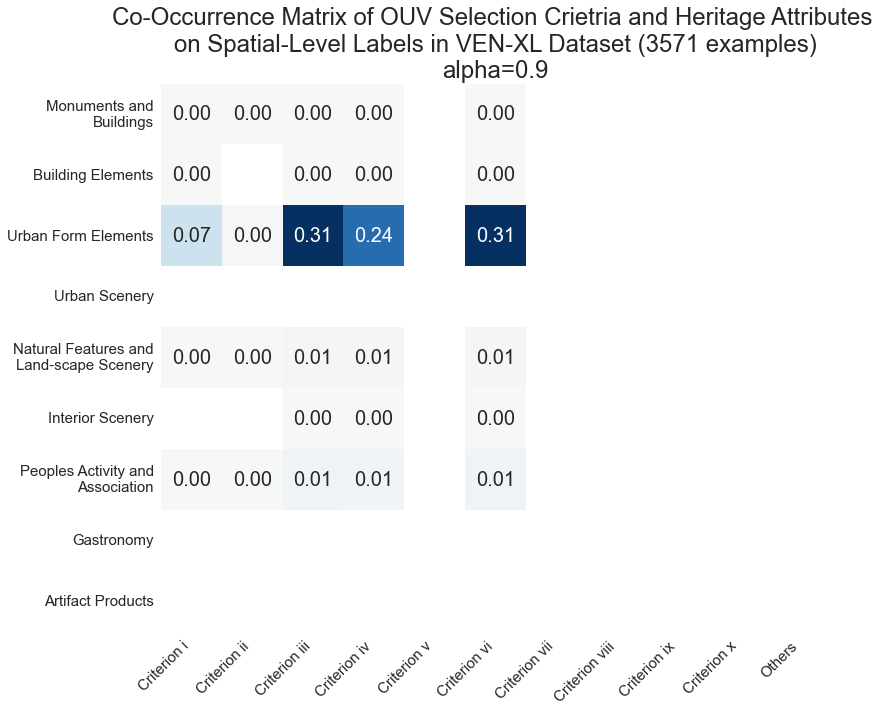

In [117]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN-XL Dataset ({} examples)\nalpha=0.9'.format(pred.shape[0]),size=24)
    plt.show()

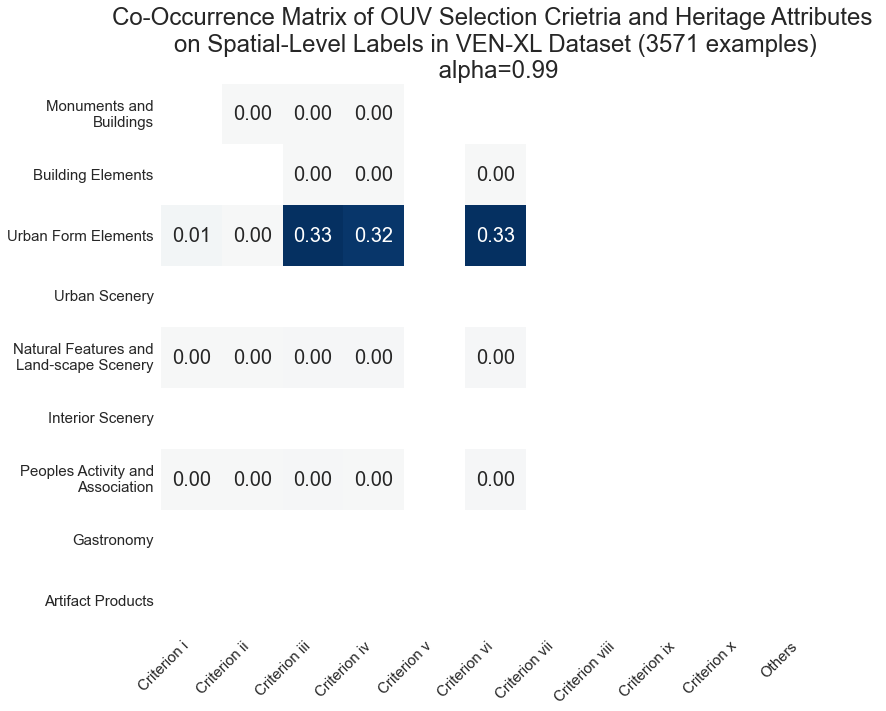

In [125]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_3/pred.shape[0]/3, annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN-XL Dataset ({} examples)\n alpha=0.99'.format(pred.shape[0]),size=24)
    plt.show()

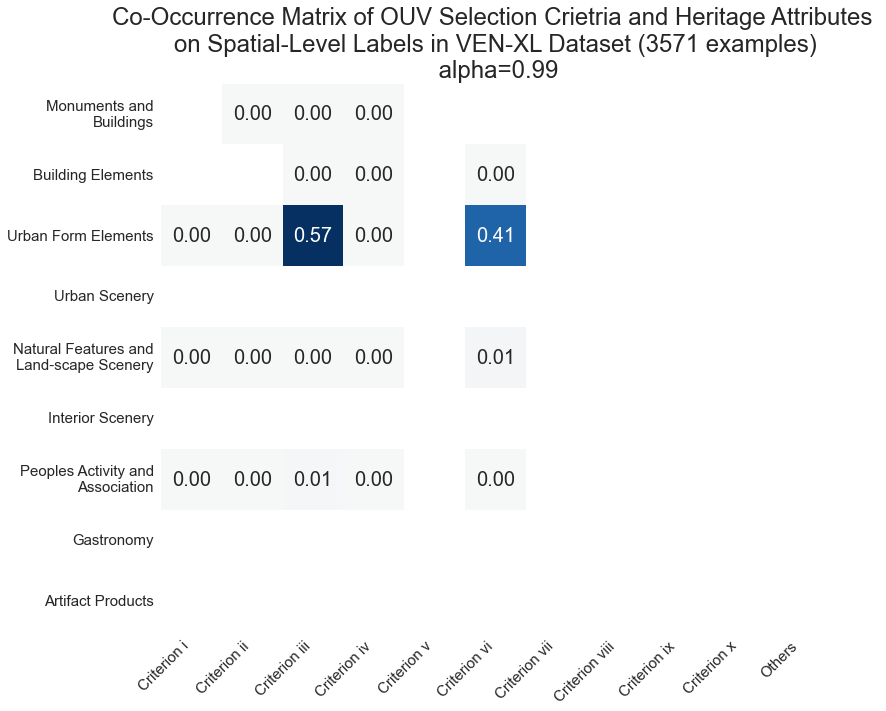

In [126]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(O_1/pred.shape[0], annot=True, center=0, annot_kws = {'fontsize':20}, mask = O_3==0,
                     robust=True, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=0)
    plt.title('Co-Occurrence Matrix of OUV Selection Crietria and Heritage Attributes \non Spatial-Level Labels in VEN-XL Dataset ({} examples)\n alpha=0.99'.format(pred.shape[0]),size=24)
    plt.show()